# Gaussian toy example

In [48]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

from goldmine.inference.nde import MAFInference
from goldmine.inference.scandal import SCANDALInference

In [49]:
width = 0.5

def calculate_true_log_p(x, theta):
    return np.log( 0.25 * (
        norm.pdf(x[:,0], loc=theta.flatten(), scale=width) * norm.pdf(x[:,1], loc=0., scale=width)
        + norm.pdf(x[:,0], loc=0., scale=width) * norm.pdf(x[:,1], loc=-theta.flatten(), scale=width)
        + norm.pdf(x[:,0], loc=0., scale=width) * norm.pdf(x[:,1], loc=theta.flatten(), scale=width)
        + norm.pdf(x[:,0], loc=-theta.flatten(), scale=width) * norm.pdf(x[:,1], loc=0., scale=width)
    ))

def calculate_true_t(x, theta):
    p = 0.25 * (
        norm.pdf(x[:,0], loc=theta.flatten(), scale=width) * norm.pdf(x[:,1], loc=0., scale=width)
        + norm.pdf(x[:,0], loc=0., scale=width) * norm.pdf(x[:,1], loc=-theta.flatten(), scale=width)
        + norm.pdf(x[:,0], loc=0., scale=width) * norm.pdf(x[:,1], loc=theta.flatten(), scale=width)
        + norm.pdf(x[:,0], loc=-theta.flatten(), scale=width) * norm.pdf(x[:,1], loc=0., scale=width)
    )
    
    tp = 0.25 * (
        norm.pdf(x[:,0], loc=theta.flatten(), scale=width) * norm.pdf(x[:,1], loc=0., scale=width)
        *  (x[:,0] - theta) / width**2
        - norm.pdf(x[:,0], loc=0., scale=width) * norm.pdf(x[:,1], loc=-theta.flatten(), scale=width)
        *  (x[:,1] + theta) / width**2
        + norm.pdf(x[:,0], loc=0., scale=width) * norm.pdf(x[:,1], loc=theta.flatten(), scale=width)
        *  (x[:,1] - theta) / width**2
        - norm.pdf(x[:,0], loc=-theta.flatten(), scale=width) * norm.pdf(x[:,1], loc=0., scale=width)
        *  (x[:,0] + theta) / width**2
    )
    
    return tp / p


## Data from previous simulator runs

In [50]:
theta_train = np.load('../../data/samples/gaussian/theta0_train.npy')
x_train = np.load('../../data/samples/gaussian/x_train.npy')
log_p_train = calculate_true_log_p(x_train, theta_train)
log_p_hat_maf_train = np.load('../../data/results/gaussian/maf/log_p_hat_train.npy').reshape((-1,1))
log_p_hat_scandal_train = np.load('../../data/results/gaussian/scandal/log_p_hat_train.npy').reshape((-1,1))

theta_test = np.load('../../data/samples/gaussian/theta0_test.npy')
x_test = np.load('../../data/samples/gaussian/x_test.npy')
log_p_test = calculate_true_log_p(x_test, theta_test)
log_p_hat_maf_test = np.load('../../data/results/gaussian/maf/log_p_hat_test.npy').reshape((-1,1))
log_p_hat_scandal_test = np.load('../../data/results/gaussian/scandal/log_p_hat_test.npy').reshape((-1,1))

theta_test_st = np.load('../../data/samples/gaussian/theta0_test_singletheta.npy')
x_test_st = np.load('../../data/samples/gaussian/x_test_singletheta.npy')
t_xz_test_st = np.load('../../data/samples/gaussian/t_xz_test_singletheta.npy')
log_p_test_st = calculate_true_log_p(x_test_st, theta_test_st)
log_p_hat_maf_test_st = np.load('../../data/results/gaussian/maf/log_p_hat_test_singletheta.npy').reshape((-1,1))
log_p_hat_scandal_test_st = np.load('../../data/results/gaussian/scandal/log_p_hat_test_singletheta.npy').reshape((-1,1))
t_hat_maf_test_st = np.load('../../data/results/gaussian/maf/t_hat_test_singletheta.npy').reshape((-1,1))
t_hat_scandal_test_st = np.load('../../data/results/gaussian/scandal/t_hat_test_singletheta.npy').reshape((-1,1))

x_gen_maf = np.load('../../data/results/gaussian/maf/samples_from_p_hat.npy')
x_gen_scandal = np.load('../../data/results/gaussian/scandal/samples_from_p_hat.npy')


## Plot log p

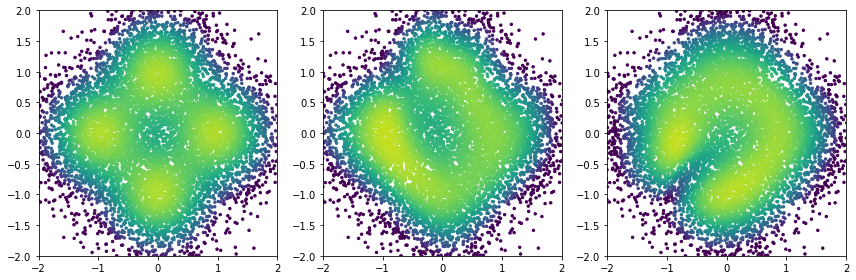

In [55]:
skip=1
cmin = -4
cmax = -1.5

fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
plt.scatter(x_test_st[::skip,0], x_test_st[::skip,1], c=log_p_test_st[::skip], cmap='viridis',
            vmin=cmin, vmax=cmax, s=6.)
plt.xlim(-2,2.,)
plt.ylim(-2.,2.)

ax = plt.subplot(1,3,2)
plt.scatter(x_test_st[::skip,0], x_test_st[::skip,1], c=log_p_hat_maf_test_st[::skip], cmap='viridis',
            vmin=cmin, vmax=cmax, s=6.)
plt.xlim(-2.,2,)
plt.ylim(-2.,2.)

ax = plt.subplot(1,3,3)
plt.scatter(x_test_st[::skip,0], x_test_st[::skip,1], c=log_p_hat_scandal_test_st[::skip], cmap='viridis',
            vmin=cmin, vmax=cmax, s=6.)
plt.xlim(-2.,2,)
plt.ylim(-2.,2.)

plt.tight_layout()
plt.show()



## Score

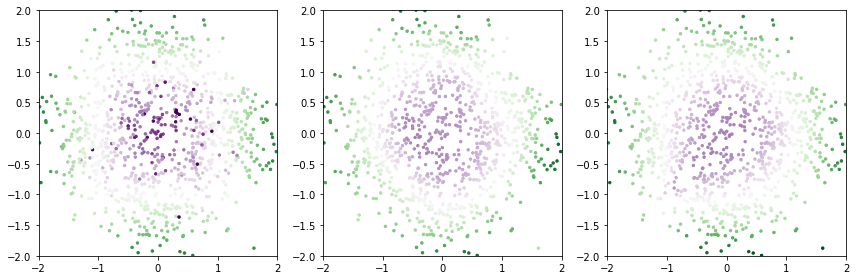

In [65]:
skip=10
cmin = -5.
cmax = 5.

fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
plt.scatter(x_test_st[::skip,0], x_test_st[::skip,1], c=t_xz_test_st[::skip], cmap='PRGn',
            vmin=cmin, vmax=cmax, s=6.)
plt.xlim(-2,2.,)
plt.ylim(-2.,2.)

ax = plt.subplot(1,3,2)
plt.scatter(x_test_st[::skip,0], x_test_st[::skip,1], c=t_hat_maf_test_st[::skip], cmap='PRGn',
            vmin=cmin, vmax=cmax, s=6.)
plt.xlim(-2.,2,)
plt.ylim(-2.,2.)

ax = plt.subplot(1,3,3)
plt.scatter(x_test_st[::skip,0], x_test_st[::skip,1], c=t_hat_scandal_test_st[::skip], cmap='PRGn',
            vmin=cmin, vmax=cmax, s=6.)
plt.xlim(-2.,2,)
plt.ylim(-2.,2.)

plt.tight_layout()
plt.show()


## Generated samples

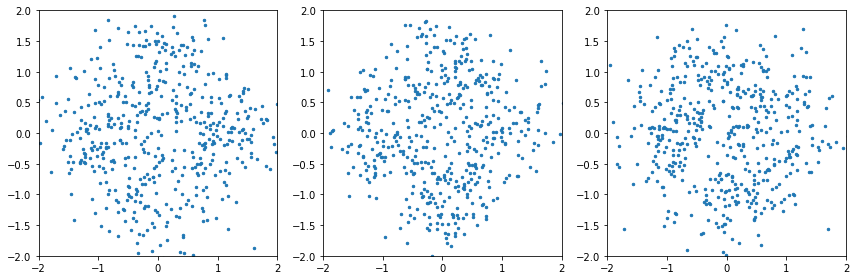

In [66]:
skip=20
cmin, cmax = -2., 0.
tmin, tmax = -10., 10.

fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
plt.scatter(x_test_st[::skip,0], x_test_st[::skip,1], s=6.)
plt.xlim(-2,2.,)
plt.ylim(-2.,2.)

ax = plt.subplot(1,3,2)
plt.scatter(x_gen_maf[::skip,0], x_gen_maf[::skip,1], s=6.)
plt.xlim(-2.,2,)
plt.ylim(-2.,2.)

ax = plt.subplot(1,3,3)
plt.scatter(x_gen_scandal[::skip,0], x_gen_scandal[::skip,1],  s=6.)
plt.xlim(-2.,2,)
plt.ylim(-2.,2.)

plt.tight_layout()
plt.show()


## Check learned model for different thetas

In [60]:
maf = MAFInference(filename='../../data/models/gaussian/maf/model')
scandal = SCANDALInference(filename='../../data/models/gaussian/scandal/model')

In [61]:
thetas_eval = [0., 0.5, 1., 1.5, 2.]
thetas_eval = [np.array(t).reshape((-1,1)) for t in thetas_eval]

resolution = 50

xi = np.linspace(-3.,3.,resolution)
yi = np.linspace(-3.,3.,resolution)
xx, yy = np.meshgrid(xi, yi)
x_eval = np.array(list(zip(xx.flatten(), yy.flatten())))

In [62]:
log_p = []
log_p_hat_maf = []
log_p_hat_scandal = []
t_true = []
t_hat_maf = []
t_hat_scandal = []

for theta in thetas_eval:
    log_p.append(calculate_true_log_p(x_eval, theta.flatten()))
    t_true.append(calculate_true_t(x_eval, theta.flatten()))
    
    log_p_hat_maf.append(maf.predict_density(theta, x_eval, log=True))
    log_p_hat_scandal.append(scandal.predict_density(theta, x_eval, log=True))
    
    t_hat_maf.append(maf.predict_score(theta, x_eval))
    t_hat_scandal.append(scandal.predict_score(theta, x_eval))


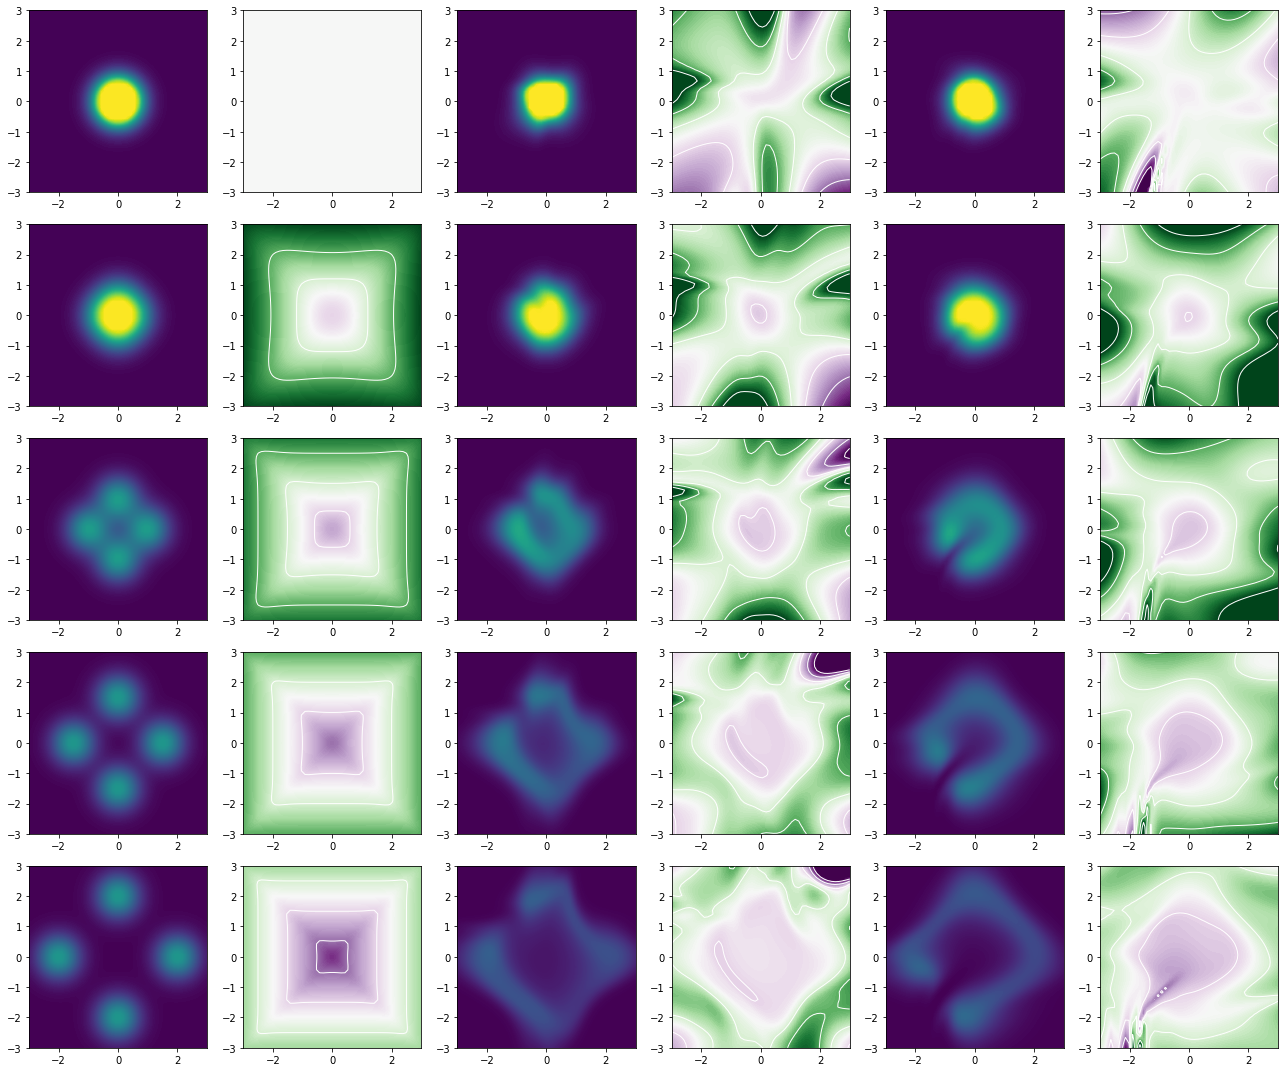

In [63]:
cmin, cmax = 0., 0.3
tmin, tmax = -10., 10.

fig = plt.figure(figsize=(18,15))

for t in range(5):

    ax = plt.subplot(5,6,t*6 + 1)
    cs = plt.contourf(xi, yi, np.clip(np.exp(log_p[t]),cmin,cmax).reshape((resolution, resolution)), 100, cmap="viridis",
                      vmin=cmin, vmax=cmax)
    plt.contour(xi, yi, log_p[t].reshape((resolution, resolution)), np.linspace(cmin,cmax,6),
                linewidths=1., colors='white',
                linestyles='solid')
    plt.xlim(-3.,3.)
    plt.ylim(-3.,3.)

    ax = plt.subplot(5,6,t*6 + 2)
    cs = plt.contourf(xi, yi, np.clip(t_true[t],tmin,tmax).reshape((resolution, resolution)), 100, cmap="PRGn",
                      vmin=tmin, vmax=tmax)
    plt.contour(xi, yi, t_true[t].reshape((resolution, resolution)), np.linspace(tmin,tmax,6),
                linewidths=1., colors='white',
                linestyles='solid')
    plt.xlim(-3.,3.)
    plt.ylim(-3.,3.)

    ax = plt.subplot(5,6,t*6 + 3)
    cs = plt.contourf(xi, yi, np.clip(np.exp(log_p_hat_maf[t]),cmin,cmax).reshape((resolution, resolution)), 100, cmap="viridis",
                      vmin=cmin, vmax=cmax)
    plt.contour(xi, yi, log_p_hat_maf[t].reshape((resolution, resolution)), np.linspace(cmin,cmax,6),
                linewidths=1., colors='white',
                linestyles='solid')
    plt.xlim(-3.,3.)
    plt.ylim(-3.,3.)

    ax = plt.subplot(5,6,t*6 + 4)
    cs = plt.contourf(xi, yi, np.clip(t_hat_maf[t],tmin,tmax).reshape((resolution, resolution)), 100, cmap="PRGn",
                      vmin=tmin, vmax=tmax)
    plt.contour(xi, yi, t_hat_maf[t].reshape((resolution, resolution)), np.linspace(tmin,tmax,6),
                linewidths=1., colors='white',
                linestyles='solid')
    plt.xlim(-3.,3.)
    plt.ylim(-3.,3.)

    ax = plt.subplot(5,6,t*6 + 5)
    cs = plt.contourf(xi, yi, np.clip(np.exp(log_p_hat_scandal[t]),cmin,cmax).reshape((resolution, resolution)), 100, cmap="viridis",
                      vmin=cmin, vmax=cmax)
    plt.contour(xi, yi, log_p_hat_scandal[t].reshape((resolution, resolution)), np.linspace(cmin,cmax,6),
                linewidths=1., colors='white',
                linestyles='solid')
    plt.xlim(-3.,3.)
    plt.ylim(-3.,3.)

    ax = plt.subplot(5,6,t*6 + 6)
    cs = plt.contourf(xi, yi, np.clip(t_hat_scandal[t],tmin,tmax).reshape((resolution, resolution)), 100, cmap="PRGn",
                      vmin=tmin, vmax=tmax)
    plt.contour(xi, yi, t_hat_scandal[t].reshape((resolution, resolution)), np.linspace(tmin,tmax,6),
                linewidths=1., colors='white',
                linestyles='solid')
    plt.xlim(-3.,3.)
    plt.ylim(-3.,3.)

plt.tight_layout()
plt.show()